In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline (optional, only needed in some Jupyter setups)
%matplotlib inline

In [4]:
# Load the dataset
df = pd.read_csv('mudah-apartment-kl-selangor.csv')

# Show the first few rows
df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [5]:
# Check the number of rows and columns
print("Dataset shape:", df.shape)

# Get data type information and null value counts
df.info()

# Check for missing values
print("Missing values in Dataset:")
print(df.isnull().sum())

Dataset shape: (19991, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), ob

In [6]:
# Check for column types, missing values, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

In [7]:
# Example: Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# summary statistics for numerical columns
df.describe()

,ads_id,completion_year,parking,bathroom
count,6.043000e+03,6043.000000,6043.000000,6043.000000
mean,9.975880e+07,2014.969055,1.465994,1.925534
std,3.321355e+06,6.790393,0.563681,0.567883
min,1.671763e+07,1980.000000,1.000000,1.000000
25%,9.985154e+07,2013.000000,1.000000,2.000000
50%,1.001818e+08,2017.000000,1.000000,2.000000
75%,1.005978e+08,2020.000000,2.000000,2.000000
max,1.008543e+08,2025.000000,10.000000,8.000000


In [9]:
# Check unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

prop_name: ['The Hipster @ Taman Desa' 'Sentul Point Suite Apartment'
 'Arte Plus Jalan Ampang' 'Nova I' 'PV9 Residences @ Taman Melati'
 'Maxim Citilights' 'Legasi Kampong Bharu' 'Majestic Maxim' '28 Dutamas'
 'G Residence @ Desa Pandan' 'Greenpark'
 'Bennington Residences @ SkyArena' 'Sri Putramas'
 'The Havre @ Bukit Jalil' 'KL Traders Square Residences' 'Banyan Tree'
 'Faber Ria' 'Villa Wangsamas' 'Central Residence @ Sg Besi'
 'Unio Residence' '1 Petaling' 'Suasana Lumayan' 'Plaza Prima Setapak'
 'One Maxim' 'M Centura' 'Residensi KepongMas' 'Bayu Sentul Condominium'
 'OG Heights' '8 Petaling' 'Hedgeford 10 Residences @ Wangsa Maju'
 'The Establishment' 'The Henge Kepong' 'Lakeville Residence'
 'First Residence' 'Bayu Tasik 2' 'Desa Dua Aman Puri' 'Sentrio Suites'
 'Bayu @ Pandan Jaya' '10 Semantan' 'Impiana Sky Residensi' 'M Vertica'
 'Damai Hillpark' 'Vina Versatile Homes' 'Pangsapuri Melur (Sentul)'
 'Platinum OUG Residence' 'Sri Pelangi (Jalan Genting Kelang)'
 'The Park 2, Pa

In [14]:
# Fill missing values for numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

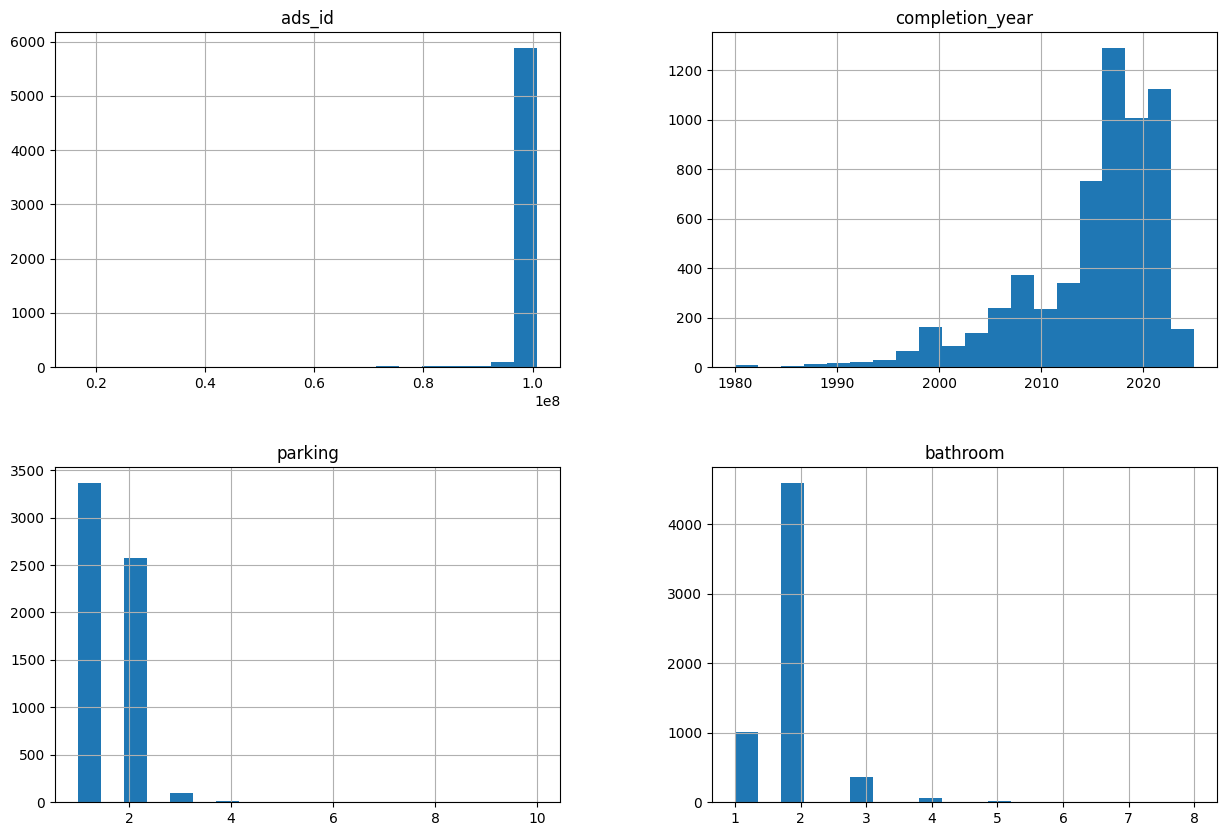

In [11]:
# a) Univariate Analysis
# Examine individual columns.
# Plot histogram for numerical data
df.hist(bins=20, figsize=(15,10))
plt.show()

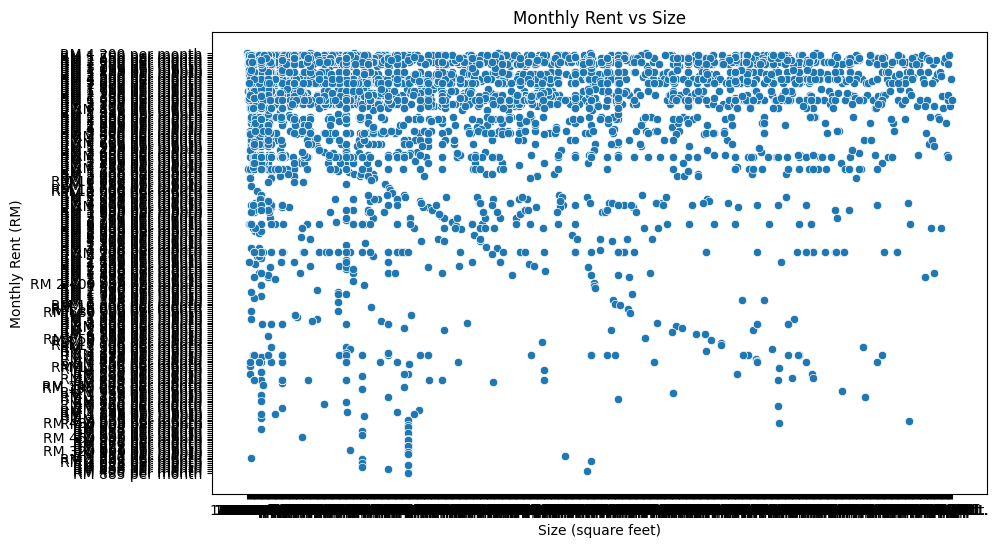

In [12]:
# b) Bivariate Analysis
# Explore relationships between two columns.
# Scatter plot for monthly rent vs. size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size', y='monthly_rent')
plt.title('Monthly Rent vs Size')
plt.xlabel('Size (square feet)')
plt.ylabel('Monthly Rent (RM)')
plt.show()

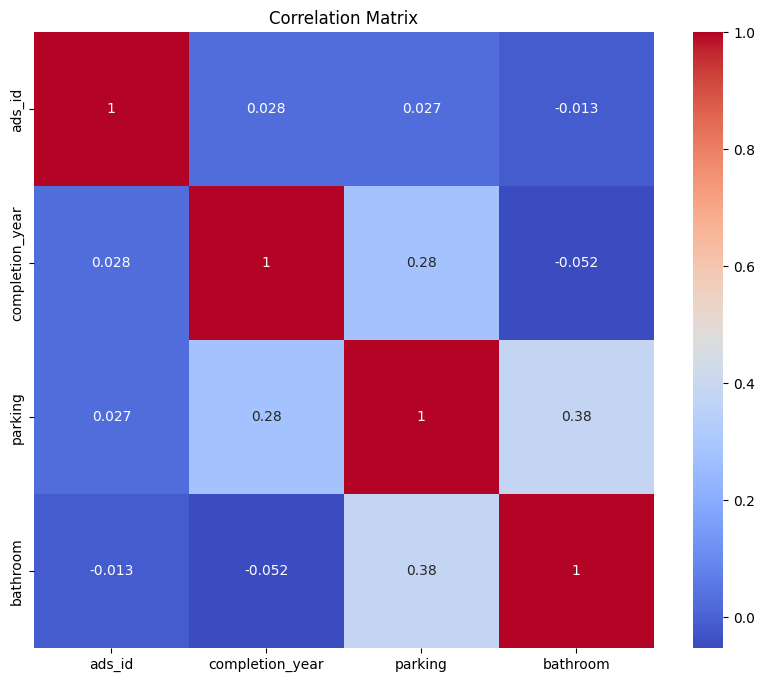

In [13]:
# c) Correlation Analysis
# Check correlation between numerical columns.
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Display correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()